# Word Embeddings


## Motivação

*Word embedding* é uma técnica de  Processamento de Linguagem Natural (NLP) que consiste em representar palavras como vetores numéricos. Esta representação é necessária porque alguns algoritmos de inteligência artifical são capazes de manipular apenas números. Dessa forma, gerar *word embeddings* é essencial para criar a entrada de modelos de NLP, como tradução automática, chatbots, análise de sentimentos, sumarização, entre outros.

Anteriormente, na tarefa de classificação, foram vistas três formas de representar palavras por meio de vetores: One-hot-enconding , Representação baseada em contagem, isto é, a Frequência da Palavra e TF-IDF. A diferença entre tais métodos e os word embeddings, é que os mesmos são capazes de captar a relação entre palavras de forma mais profunda. Dessa forma, estudar word embedding é essencial para utilizar, criar e implementar modelos de NLP na qual a base de dados textual esteja melhor representada matematicamente.

Este laboratório irá demonstrar como transformar palavras em word embeddings usando a biblioteca *gensim* e utilizará gráficos t-SNE para demonstrar que as distâncias entre os embeddings está correlacionada com a relação semântica entre as palavras (e.g., rei e rainha estão mais próximos no espaço que rei e futebol).



## Resultados Esperados


Neste laboratório, espera-se que os alunos compreendam o que são Word Embeddings e os principais algoritmos para implementá-los. Ademais, é esperado a partir dos cálculos de similaridade e de plotar gráficos t-SNE, os estudantes assimilem que palavras relacionadas semanticamente estão mais próximas no espaço vetorial e possuem maior grau de similaridade.


## Fundamentação teórica

Os Word embeddings são uma técnica de (NLP) que consiste em representar palavras como vetores numéricos, tipicamente em um espaço vetorial de alta dimensão.

Por exemplo, considere a palavra SENHORA. É de conhecimento geral que essa palavra é uma das palavras atribuídas ao gênero feminino. Dessa forma, ao tentar-se criar um vetor para tal palavra, poderia-se atribuir  uma dimensão "gênero" variando de 1 a -1. Assim, quanto mais próximo de 1, mais próximo do gênero feminino e quanto mais próximo de -1, mais próximo do gênero masculino. Observe a Figura abaixo:



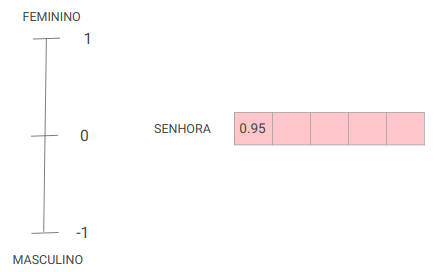

In [ ]:
from IPython.display import Image, display
!wget -q "https://github.com/elainedias16/TCC/raw/main/assets/word_embeddings/senhora.png" -O senhora.png
display(Image("senhora.png", width=500))

É possível perceber que apenas essa dimensão não é suficiente para captar o significado da palavra SENHORA, por isso é preciso introduzir mais dimensões nesse vetor para melhor representar a palavra SENHORA. Assim, cada dimensão no vetor representa uma característica ou propriedade da palavra.

É preciso preencher cada dimensão do vetor de cada palavra com um valor que seja representativo o suficiente para a característica em questão. Por causa disso, surgiram algoritmos para gerar os embedding de palavras. Os mais famosos são:

* Word2vec
* GloVe
* FastText


## CBOW

 Considere uma palavra de referência e as palavras ao redor desta. O conjunto de palavras ao redor da palavra de referência é chamado de janela de contexto da palavra. No algoritmo CBOW, a palavra de referência é "escondida" e o algoritmo tenta adivinhar a palavra com base naquelas que estão ao redor. Assim, um modelo de aprendizado de máquina prediz para cada palavra no dicionário, a probabilidade dela ser a palavra de referência. Este processo é repetido para palavras escolhidas aleatoriamente em um dataset de textos. Ao final do processo, o algoritmo irá construir representações que indiquem que a palavra BOLA, por exemplo, tem maior probabilidade próxima a termos como JOGADOR, TIME, GOL e OLIMPÍADA do que de termos como POLICIAL, ATRIZ e POLÍTICA. Dessa forma, durante o treinamento, o algoritmo CBOW ajusta iterativamente os vetores de palavras no espaço de embedding para maximizar a probabilidade de prever corretamente a palavra de referência com base nas palavras do contexto, resultando em representações vetoriais que capturam a semântica e as relações entre palavras no corpus de treinamento.

Programaticamente, é definido o tamanho da janela de contexto e os contextos são definidos. Após isso, são criados vetores one-hot para cada palavra do vocabulário. Posteriormente, uma matriz de embeddings de entrada $(W)$ e uma matriz de embeddings de saída $(W')$ são inicializadas com valores aleatórios.
Para cada contexto definido previamente, os vetores one-hot das palavras do contexto são multiplicados por $W$ para gerar os embeddings.Em seguida, a média desses embddings é calculada, multiplicada pela matriz $W'$ e utilizada como entrada para uma camada de softmax. A saída do softmax é um vetor de probabilidade, que mostra a probabilidade de cada palavra do vocabulário ser a palavra de referência. A função de perda é calculada utilizando a entropia cruzada entre o vetor de probabilidades e o vetor one-hot da palavra target. Os pesos da matriz de embeddings $W$ e $W'$ são atualizados para minimizar a loss.

###Exemplo:
Dada a sentença: O gato subiu na árvore.

Vocabulário : { O , gato, subiu , na , árvore }

Dimensão :  5

**Vetores one-hot :**

$v_O$ -> [ 1 , 0, 0, 0, 0]

$v_{gato}$ -> [0, 1, 0, 0, 0]

$v_{subiu}$ -> [0, 0, 1, 0, 0]

$v_{na}$ -> [0, 0, 0, 1, 0]

$v_{arvore}$ -> [0, 0, 0, 0 , 1]

Tamanho da janela de contexto : 2

**Pares de treinamente:**

(O, gato) -> subiu

(gato, subiu) -> na

(subiu, na) -> árvore

Note que é possível criar diversos pares de treinamento, deslocando a janela de contexto. Isso fica a critério do programador.

**Inicialização da matriz de embeddings:**

A matriz de embeddings $W$ terá a mesma quantidade de linhas do tamanho no vocabulário e número de colunas arbitrário. Para esse exemplo, foi escolhido o número de colunas como 3. Assim, $W$ é uma matriz 5x3. Já a matriz $W'$ será 3x5. Ambas são inicilizadas aleatoriamente


**Para obter os emebeddings de contexto**:

Embeddings do primeiro contexto:

(O, gato) -> subiu

 $h_O = W^T \cdot v_o $

$ h_{\text{gato}} = W^T \cdot v_{\text{gato}} $

Embeddings do segundo contexto:

...


**Média dos embeddings:**

$ x = \frac{h_O + h_{\text{gato}} + h_{\text{na}} + h_{\text{árvore}}}{4} $

**Multiplicação pela matriz de saída:**

$z = W'^T \cdot x$

**Aplicação do sfotmax :**

$ŷ = softmax(z)$


**Cálculo da Loss** :

A função de perda usada no CBOW é a entropia cruzada entre $ŷ$ e o vetor da palavra target, nesse caso, o vetor da palavra subiu, [0, 0, 1, 0, 0] . Esta função de perda equivale a tratar o problema de predição de palavra como um problema de classificação em que as classes possíveis são as palavras do dicionário.

**Atualização dos pesos**:

Cálculos de gradiente e atualição dos pesos de $W$ e $W'$.


A arquitetura do CBOW é mostrada abaixo. Na imagem é possível observar a entrada, que são as palavras do contexto e a saída, que é a palavra target.



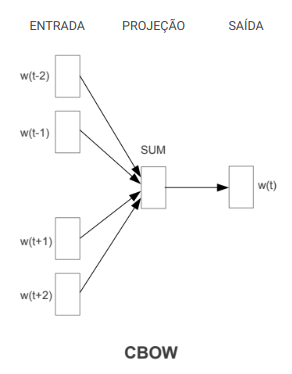

In [ ]:
from IPython.display import Image
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/word_embeddings/cbow.png" -O cbow.png
Image("cbow.png", width=400)

Esse processo de treinamento é feito iterativamente até atingir certos critérios de loss ou épocas ou algum outro critério. Após o treinamento, os embeddings do vocabulário estão na matriz $W$.


## Skip-gram



A segunda variante do Word2Vec é skip-gram, sendo este o inverso do CBOW. Nesse sentido, dado uma palavra de referência, o modelo tenta adivinhar as palavras da janela de contexto. Assim, os embeddings das palavras serão armazenas nos pesos da camada oculta.

De forma similiar ao CBOW, inicialmente define-se o tamanho da janela de contexto , cria-se os pares de treinamento e os vetores one-hot do vocabulário. Neste modelo, a entrada consistirá de apenas um vetor one-hot, que  representará a palavra de referência, a qual é escolhida aleatoriamente. O vetor de entrada one-hot é multiplicado pela matriz $W$, a qual é inicializada aleatoriamente. Posteriormente, o resultado é multiplicado pela matriz $W'$ e em seguida é aplicado uma função de ativação para gerar o vetor de probabilidades das palavras de contexto. Assim como no CBOW, a função de perda utilizada costuma ser a entropia cruzada e o processo é repetido para todos os pares de treinamento de forma a ajustar os pesos das matrizes $W$ e $W'$.

Ao final do treinamento utilizando as palavras do vocabulário, os embeddings estão na matriz $W$. Note que o processo é bastante similiar ao CBOW, com a diferença sendo na entrada, a qual consiste apenas do vetor one-hot da palavra de referência, e após a multiplicação do vetor one-hot da palavra de referência pela matriz $W$, pois após essa multiplicação, o cálculo da média, presente no CBOW, não é realizado no Skip-Gram.

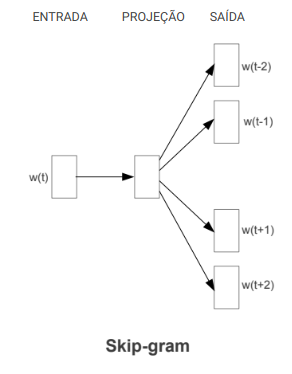

In [ ]:
from IPython.display import Image
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/word_embeddings/skip-gram.png" -O skip_gram.png
Image("skip_gram.png", width=400)

## GloVe



O GloVe (Global Vectors for Word Representation) é um algoritmo que usa estatísticas globais das palavras do vocabulário alidos ao conceito de contexto, presente no Word2Vec.

Considere uma matriz de co-ocorrência $X$, sendo que cada linha $i$ e cada coluna $j$ representam palavras do vocabulário. Assim, dado uma janela de contexto, a célula $Xij$ representa a co-ocorrência de palavra $j$ no contexto de palavra $i$.

Por exemplo, dada a frase :  'O gato subiu na árvore'.

Considerando uma janela de contexto de tamanho 2, tem-se:

'O' : contexto = ['gato']

'gato' : contexto = ['O, 'subiu']

'subiu' : contexto = ['gato' , 'na']

'na' : contexto = ['subiu', 'arvore']

'arvore' : contexto = ['na']

Portanto, a matriz de co-ocorrência é dada por :

\begin{array}{|c|ccccc|}
  \hline
  & O & gato & subiu & na & árvore \\
  \hline
  O     & 0 & 1 & 0 & 0 & 0 \\
  gato  & 1 & 0 & 1 & 1 & 0 \\
  subiu & 0 & 1 & 0 & 1 & 1 \\
  na    & 0 & 1 & 1 & 0 & 1 \\
  árvore & 0 & 0 & 1 & 1 & 0 \\
  \hline
\end{array}


Em seguida, os vetores das palavras $W_i$ e os vetores de contexto $\tilde{W}_j $ são inicilizados aleatoriamente. Assim, é definido um número máximo de iterações e uma função de perda. A função de perda do GloVe busca minimizar a diferença entre o produto escalar dos vetores de duas palavras $ij$ e o logaritmo de suas probabilidades de co-ocorrência, sendo dada por :


$J = \sum_{i,j=1}^{V} f(X_{ij}) \left(W_i^T \tilde{W}_j + b_i + \tilde{b}_j - \log{X_{ij}}\right)^2$ , onde :


$J$ representa a função de perda total;

$V$ representa o tamanho do vocabulário;

$W_i$ representa o vetor da palavra $i$;

$\tilde{W}_j $ representa o vetor de contexto da palavra $j$;

$bi$ e $\tilde{b}_j$ representam o bias associados às palavras $i$ e $j$;

$f(X_{ij})$ é uma função de ponderação que atribui pesos maiores a co-ocorrências menos frequentes e pesos menores a co-ocorrências mais frequentes.

Essa atribuição de pesos visa atribur mais importância a co-ocorrências raras, pois considera-se que essas capturam relações semânticas mais significativas.

$f(X_{ij})$ é frequentemente definida como:


$
f(x) =
\begin{cases}
    \left(\frac{x}{x_{\max}}\right)^{\alpha} & \text{se } x < x_{\max} \\
    1 & \text{, caso contrário}
\end{cases}
$


Os autores do algoritmo encontraram de forma empírica que o valor $\alpha = \frac{3}{4}$ é uma escolha eficaz.


Dessa forma, para cada iteração, calcula-se o produto escalar entre os vetores $W_i$ e $\tilde{W}_j $ para cada par de palavras $ij$ presente na matriz de coocorrências, buscando minimizar a função de perda utilizando gradiente descendente de forma a ajustar os vetores $Wi$ e $\tilde{W}_j$ . Ao final do treinamento, os word embeddings são extraídos a partir dos vetores $Wi$.




## Similaridade

Tanto o Word2Vec quanto o GloVe em seus word embeddings atribuem vetores semelhantes a palavras com significados semelhantes semânticamente. Matematicamente, essa semelhança é capturada pelo conceito de similaridade vetorial, a qual, no contexto de word embeddings, busca calcular o quão próximo dois vetores estão. Existem diversas formas de calcular similidaridade, como Similidaridade do Cosseno, Similaridade de Jaccard, entre outras. Neste laboratório, será utilizada a Similaridade do Cosseno, a qual é dada por :

$
\text{Similaridade do cosseno}(A, B) = \cos(\theta) = \frac{A \cdot B}{\|A\| \cdot \|B\|}
$

Essa medida varia de $0$ a $1$, sendo que quanto mais perto de $1$, mais similar são os vetores e quanto mais perto de $0$, mais distintos.

Além de cálculos de similaridade, é possível realizar operações vetoriais com os word embeddings, uma vez que as palavras são tranformadas em vetores. Portanto, é possível realizar operações como:

$
\vec{\text{rei}} - \vec{\text{homem}} + \vec{\text{mulher}} \approx  \vec{\text{rainha}}
$


A visualização dessas palavras pode ser obtida a partir de gráfico t-SNE, o qual aplica uma redução de dimensionalidade e plota os pontos das palvras em um espaço 2D.


Em geral, os word embeddings possuem muitas dimensões, visando capturar melhor a semântica das palavras. No entanto, para certas análises, é necessário visualizar esses embeddings. Para isso, existem técnicas de visualização, como o gráfico t-SNE. Essa técnica realiza a redução da dimensionalidade dos embeddings, transformando-os em dois componentes, as coordenadas x e y. Assim, neste laboratório, será possível fazer uma análise visual das relações semânticas das palavras, com o gráfico t-SNE e percentual, a partir da similaridade do cosseno.

## Código

Imports de bibliotecas para pré processamento.

In [ ]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import spacy
from spacy.lang.en.examples import sentences

!pip install unidecode
import unidecode
from nltk.stem.porter import PorterStemmer
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Download do dataset pré processado.

In [ ]:
!wget https://raw.githubusercontent.com/elainedias16/TCC/main/pre_processed_dataset.csv

--2024-10-02 20:32:18--  https://raw.githubusercontent.com/elainedias16/TCC/main/pre_processed_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84507 (83K) [text/plain]
Saving to: ‘pre_processed_dataset.csv’

pre_processed_datas 100%[===================>]  82.53K  --.-KB/s    in 0.03s   

2024-10-02 20:32:18 (2.58 MB/s) - ‘pre_processed_dataset.csv’ saved [84507/84507]



Leitura do dataset pré processado.

In [ ]:
import pandas as pd

with open('pre_processed_dataset.csv', 'r') as file:
    lines = file.readlines()


def create_dataframe(path):
    columns=['genre', 'filename', 'title', 'content']
    df =  pd.read_table(
    path,
    header=None,
    names=columns,
    sep= ',',
    engine= 'python'
    )
    return df


df = create_dataframe('pre_processed_dataset.csv')

In [ ]:
df.head()

,genre,filename,title,content
0,genre,filename,title,content
1,business,288.txt,UK economy facing 'major risks',uk manufactur sector continu face seriou chall...
2,business,184.txt,US bank 'loses' customer details,bank america reveal lose comput tape contain a...
3,business,471.txt,China suspends 26 power projects,china order halt construct work 26 big power s...
4,business,35.txt,US gives foreign firms extra time,foreign firm give extra year meet tough new co...


Instalação de biblioteca de *gensim* e import do modelo Word2vec e do método *cosine_similarity*.

In [ ]:
!pip install gensim
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

### Word2vec

Inicialmente, serão feitos embeddings com o voculário do dataset **BBC News**. Dessa forma, o método abaixo retorna o content do DataFrame.


In [ ]:
def build_vocabulary(df):
  lines_content = df['content'].tolist()
  sentences= [line.split() for line in lines_content]
  return sentences


sentences = build_vocabulary(df)

In [ ]:
sentences

[['content'],
 ['uk',
  'manufactur',
  'sector',
  'continu',
  'face',
  'seriou',
  'challeng',
  'next',
  'two',
  'year',
  'british',
  'chamber',
  'commerc',
  'bcc',
  'say',
  'group',
  'quarterli',
  'survey',
  'compani',
  'find',
  'export',
  'pick',
  'last',
  'three',
  'month',
  '2004',
  'good',
  'level',
  'eight',
  'year',
  'rise',
  'come',
  'despit',
  'exchang',
  'rate',
  'cite',
  'major',
  'concern',
  'howev',
  'bcc',
  'find',
  'whole',
  'uk',
  'economi',
  'still',
  'face',
  'major',
  'risk',
  'warn',
  'growth',
  'set',
  'slow',
  'recent',
  'forecast',
  'econom',
  'growth',
  'slow',
  '3',
  '2004',
  'littl',
  '2',
  '5',
  '2005',
  '2006',
  'manufactur',
  'domest',
  'sale',
  'growth',
  'fall',
  'back',
  'slightli',
  'quarter',
  'survey',
  '5',
  '196',
  'firm',
  'find',
  'employ',
  'manufactur',
  'also',
  'fall',
  'job',
  'expect',
  'low',
  'level',
  'year',
  'despit',
  'posit',
  'news',
  'export',
  '

O código abaixo treina o modelo Word2vec utilizando os algoritmos do Skip-gram e do CBOW com as palavras presentes em "sentences". O parâmetro "sg" define qual algoritmo será utilizado. Os embeddings terão 100 componentes, a janela de contexto terá tamanho 5 e qualquer palavra com mais de uma ocorrência em "sentences" terá um embedding correspondente.


In [ ]:
#Skip-gram model
skipgram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

#CBOW model
cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1)

O código abaixo mostra os word embeddings de duas palavras. Rode o código e posteriormente modifique as palavras e rode novamente. Certifique-se de escolher palavras que estão no DataFrame. Para isso, escolha uma palavra que está presente em "sentences".

In [ ]:
word_1 = 'music'
word_2 = 'award'

embeddings_w1 = skipgram_model.wv['music']
embeddings_w2 = skipgram_model.wv['award']

print(f"Word embeddings {word_1}\n")
print(embeddings_w1)

print(f"\nWord embeddings {word_2}\n")
print(embeddings_w1)

Word embeddings music

[-1.93874925e-01  2.12736100e-01  1.36830643e-01 -5.10868728e-02
 -2.73880325e-02 -3.02405834e-01  1.15090452e-01  2.49712422e-01
 -6.02303036e-02 -7.52565116e-02 -1.32368192e-01 -1.44403562e-01
  5.48689328e-02  1.13262438e-04  2.31781714e-02 -1.74627364e-01
  3.14225443e-02 -3.00737113e-01 -1.23781510e-01 -2.83654630e-01
  1.21096522e-01  1.88406542e-01  9.78027433e-02 -1.00723654e-01
 -1.04688630e-01  7.17615187e-02 -1.74699202e-01 -1.22059524e-01
 -1.63676560e-01  1.83990635e-02  1.84014559e-01  1.35415852e-01
  2.88608484e-02 -1.11150136e-02  9.38578296e-07  1.45475373e-01
  1.91590935e-02 -1.31681532e-01 -1.29923552e-01 -3.72387230e-01
 -6.88600913e-02 -1.44186333e-01 -1.29757903e-03 -2.50521451e-02
  1.25212684e-01 -1.09034233e-01 -1.70422986e-01 -5.09171560e-02
 -1.72461721e-03  1.15316339e-01 -4.41641547e-02 -1.99673846e-01
 -1.62214145e-01 -3.25754721e-04 -1.98688060e-01  9.99137014e-02
  9.17094797e-02 -8.02827999e-02 -2.30140507e-01  9.22358856e-02
  

O código abaixa mostra o cálculo de similaridade para as palavras escolhidas.

In [ ]:
similarity_sg = skipgram_model.wv.similarity(word_1, word_2)
similarity_cbow = cbow_model.wv.similarity(word_1, word_2)

print(f"Cosine similarity between '{word_1}' and '{word_2}' using Skip Gram: {similarity_sg} ")
print(f"Cosine similarity between '{word_1}' and '{word_2}' using CBOW: {similarity_cbow} ")

Cosine similarity between 'music' and 'award' using Skip Gram: 0.9971308708190918 
Cosine similarity between 'music' and 'award' using CBOW: 0.10033109784126282 


## Gráfico t-SNE

O código abaixo aloca os embeddings em uma matriz.

In [ ]:
sg_words = list(skipgram_model.wv.index_to_key)
sg_word_vectors = skipgram_model.wv[sg_words]

cbow_words = list(cbow_model.wv.index_to_key)
cbow_word_vectors = cbow_model.wv[cbow_words]

O método abaixo realiza o treinamento do modelo t-SNE, o qual fará uma redução de dimensionalidade nos dados de 100 componentes para duas componentes, de forma que seja possível plotar o gráfico.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def train_tsne(word_vectors):
  tsne = TSNE(n_components=2, random_state=0)
  word_vectors_2d = tsne.fit_transform(word_vectors)
  return word_vectors_2d

In [ ]:
sg_2d_vectors = train_tsne(sg_word_vectors)
cbow_2d_vectors = train_tsne(cbow_word_vectors)

O método abaixo geras os gráficos t-SNE. Para isso, percorre-se as palavras que deseja-se plotar, capturando seu index na lista de voculário. Com o index de cada palavra, é possível encontrar as coordenadas x e y da mesma e assim, plotar o ponto corresponde à palavra.  Para saber qual ponto representa cada palavra, é adiconado uma label da mesma no gráfico.

In [ ]:
def plot_tsne(word_vectors_2d, vocabulary_words , words_to_plot):
  plt.figure(figsize=(10, 6))

  for word in words_to_plot:
    index = vocabulary_words.index(word)
    x = word_vectors_2d[index, 0]
    y = word_vectors_2d[index, 1]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=10)

  plt.xlabel("Dimension 1")
  plt.ylabel("Dimension 2")
  plt.title(f"T-SNE Word Embeddings ")
  plt.show()


##Skip-gram

Lista de palavras escolhidas para estarem no gráfico t-SNE.

In [ ]:
words =  ['show', 'music', 'cinema', 'radio', 'popular', 'ukrain', 'talk', 'good', 'countri', 'run', 'model', 'special', 'australia']

O código abaixo chama o método que gera o gráfico t-SNE, sendo os embeddings os vetores gerados peli Skip-gram.

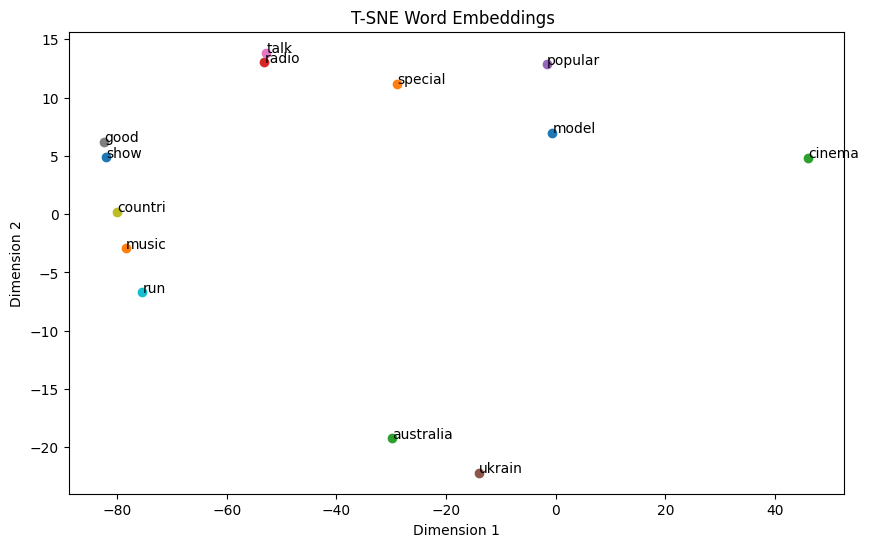

In [ ]:
plot_tsne(sg_2d_vectors, sg_words , words)

### CBOW

O código abaixo chama o método que gera o gráfico t-SNE, sendo os embeddings os vetores gerados peli CBOW.

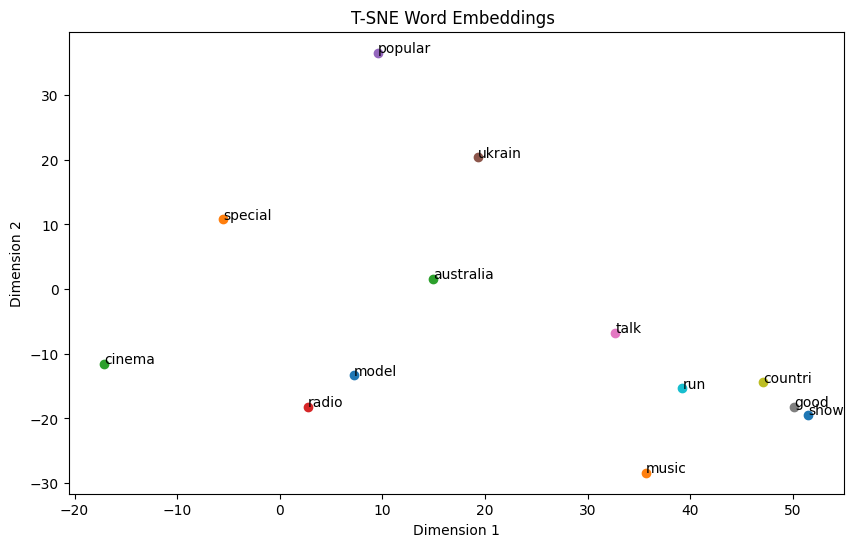

In [ ]:
plot_tsne(cbow_2d_vectors, cbow_words , words)

### Google word2vec base

Os embeddings gerados, até então, foram treinados com a base de dados do **BBC News**. Nos códigos a seguir, serão utilizado modelos pré treinados com bases de dados maiores.

O código a seguir carrega o modelo pré treinado "word2vec-google-news-300". Esse modelo é treinado com notícias do google e possui 300 componentes.

In [ ]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')
wv.save("word2vec-google-news-300.model")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


O código a abaixo realizada cálculos de similaridade com o modelo pré treinado do Word2Vec.

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

king_vec = np.array(wv['king'])
man_vec = np.array(wv['man'])
woman_vec = np.array(wv['woman'])
queen_vec =  np.array(wv['queen'])
boy_vec = np.array(wv['boy'])
boys_vec = np.array(wv['boys'])
girl_vec = np.array(wv['girl'])
girls_vec = np.array(wv['girls'])

result_vec = king_vec - man_vec + woman_vec
cos_similarity = cosine_similarity(result_vec.reshape(1, -1), queen_vec.reshape(1, -1))
print(f"Similarity between 'queen' and the result of ('king' - 'man' + 'woman') : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(woman_vec.reshape(1, -1), man_vec.reshape(1, -1))
print(f"Similarity between 'man' and 'woman' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(boy_vec.reshape(1, -1), girl_vec.reshape(1, -1))
print(f"Similarity between 'boy' and 'girl' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(boy_vec.reshape(1, -1), man_vec.reshape(1, -1))
print(f"Similarity between 'boy' and 'man' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(girl_vec.reshape(1, -1), woman_vec.reshape(1, -1))
print(f"Similarity between 'girl' and 'woman' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(boy_vec.reshape(1, -1), boys_vec.reshape(1, -1))
print(f"Similarity between 'boy' and 'boys' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(girl_vec.reshape(1, -1), girls_vec.reshape(1, -1))
print(f"Similarity between 'girl' and 'girls' : {cos_similarity[0][0]}")

Similarity between 'queen' and the result of ('king' - 'man' + 'woman') : 0.7300518155097961
Similarity between 'man' and 'woman' : 0.7664013504981995
Similarity between 'boy' and 'girl' : 0.8543272018432617
Similarity between 'boy' and 'man' : 0.6824871897697449
Similarity between 'girl' and 'woman' : 0.7494640946388245
Similarity between 'boy' and 'boys' : 0.5961058735847473
Similarity between 'girl' and 'girls' : 0.6154742240905762


O código abaixo carrega o modelo pré treinado "glove-wiki-gigaword-300". Esse modelo é treinado com dados do wikipédia e seus embeddings possuem 300 componentes.

In [ ]:
import gensim.downloader as api

glove = api.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded


O código a seguir realizada cálculos de similaridade com o modelo pré treinado do GloVe.

In [ ]:
king_vec = np.array(glove['king'])
man_vec = np.array(glove['man'])
woman_vec = np.array(glove['woman'])
queen_vec =  np.array(glove['queen'])
boy_vec = np.array(glove['boy'])
boys_vec = np.array(glove['boys'])
girl_vec = np.array(glove['girl'])
girls_vec = np.array(glove['girls'])

result_vec = king_vec - man_vec + woman_vec
cos_similarity = cosine_similarity(result_vec.reshape(1, -1), queen_vec.reshape(1, -1))
print(f"Similarity between 'queen' and the result of ('king' - 'man' + 'woman') : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(queen_vec.reshape(1, -1), man_vec.reshape(1, -1))
print(f"Similarity between 'man' and 'woman' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(boy_vec.reshape(1, -1), girl_vec.reshape(1, -1))
print(f"Similarity between 'boy' and 'girl' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(boy_vec.reshape(1, -1), man_vec.reshape(1, -1))
print(f"Similarity between 'boy' and 'man' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(girl_vec.reshape(1, -1), woman_vec.reshape(1, -1))
print(f"Similarity between 'girl' and 'woman' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(boy_vec.reshape(1, -1), boys_vec.reshape(1, -1))
print(f"Similarity between 'boy' and 'boys' : {cos_similarity[0][0]}")

cos_similarity = cosine_similarity(girl_vec.reshape(1, -1), girls_vec.reshape(1, -1))
print(f"Similarity between 'girl' and 'girls' : {cos_similarity[0][0]}")

Similarity between 'queen' and the result of ('king' - 'man' + 'woman') : 0.689616322517395
Similarity between 'man' and 'woman' : 0.22408130764961243
Similarity between 'boy' and 'girl' : 0.8272891640663147
Similarity between 'boy' and 'man' : 0.6208277940750122
Similarity between 'girl' and 'woman' : 0.7296419143676758
Similarity between 'boy' and 'boys' : 0.6812333464622498
Similarity between 'girl' and 'girls' : 0.7227292656898499


## Exercícios

### Exercício 1

Utilize os modelos pré treinados do Word2Vec e do Glove e gere os gráficos t-SNE das palavras "queen", "man", "boy", "girl", "woman", "king", "boys", "girls".

### Exercício 2

Separe 10 palavras aleatórias de cada gênero de notícias do DataFrame do BBC News e calcule as similaridades entre 5 pares de palavras. Aumente o tamanho da janela de contexto para 20.

### Exercício 3

Utilize o modelo do Glove da biblioteca *gensim* e crie embeddings com 10 e 100 dimensões. Verique se o aumento de componentes, aumenta o percentual de similaridade  para palavras semelhantes como "work" e "network" e se reduz o percentual de similaridade para palavras pouco semelhantes como "samsung" e "ten".

### Exercício 4

Liste os modelos pré treinados de word emebddings da biblioteca *gensim*.

## Referências



“O que é Word2Vec e como funciona?” edrone | CRM for e-commerce & marketing automation, 26 July 2022, https://edrone.me/pt/blog/o-que-e-word2vec

Fonseca, Camilla. “Word Embedding: Fazendo o Computador Entender o Significado Das Palavras.” Turing Talks, 23 Jan. 2021, https://medium.com/turing-talks/word-embedding-fazendo-o-computador-entender-o-significado-das-palavras-92fe22745057.

Doshi, Sanket. “Skip-Gram: NLP Context Words Prediction Algorithm.” Medium, 17 Mar. 2019, https://towardsdatascience.com/skip-gram-nlp-context-words-prediction-algorithm-5bbf34f84e0c


“Weights & Biases.” W&B, https://wandb.ai/authors/embeddings-2/reports/An-Introduction-to-the-Global-Vectors-GloVe-Algorithm--VmlldzozNDg2NTQ. Accessed 14 Aug. 2024


@article{wang2020survey,
  title={A survey of word embeddings based on deep learning},
  author={Wang, Shirui and Zhou, Wenan and Jiang, Chao},
  journal={Computing},
  volume={102},
  number={3},
  pages={717--740},
  year={2020},
  publisher={Springer}
}


@article{mikolov2013,
  author = {Mikolov, Tomas and Sutskever, Ilya and Chen, Kai and Corrado, Greg and Dean, Jeff},
  title = {Efficient Estimation of Word Representations in Vector Space},
  journal = {arXiv preprint arXiv:1301.3781},
  year = {2013},
  url = { https://arxiv.org/pdf/1301.3781 }
}

@inproceedings{pennington2014glove,
  author    = {Jeffrey Pennington and Richard Socher and Christopher D. Manning},
  title     = {GloVe: Global Vectors for Word Representation},
  booktitle = {Proceedings of the 2014 Conference on Empirical Methods in Natural Language Processing (EMNLP)},
  year      = {2014},
  publisher = {Association for Computational Linguistics},
  url       = { https://nlp.stanford.edu/pubs/glove.pdf }
}
